In [1]:
from pygbif import occurrences as occ
from pygbif import registry
import pandas as pd
import os
import time
import matplotlib.pyplot as plt

### 1. Downloading GBIF occurence files from the Seaflower Expedition



In [11]:
# Let's find all the files in the GBIF database related to Seaflower
resultsSeaflower =  registry.dataset_search('seaflower')['results']
len(resultsSeaflower)

62

In [23]:
resultsSeaflower

[{'key': '5a39c87c-9d97-4282-b3a9-e2c292b4729d',
  'title': 'Echinoderms from the Seaflower Biosphere Reserve',
  'doi': '10.15472/iipeom',
  'description': 'This dataset is described and analyzed in the Data Report “Echinoderms of the Seaflower Biosphere Reserve: state of knowledge and new findings” published in the journal Frontiers in Marine Science 6:188, doi: 10.3389/fmars.2019.00188. The data set comprises the checklist of the echinoderms species from the SeaFlower Biosphere Reserve (SFBR) based on the registers previously published by Borrero-Pérez et al. (2016), peer-reviewed papers or published reports of several investigations, open-access databases and records from unpublished results of samplings conducted in 2011 by Universidad Nacional de Colombia-Sede Caribe and the Seaflower Expeditions 2016 and 2017. A total of 148 echinoderm species were found within the SFBR. Ophiuroidea was the most species-rich class (44 species), followed by Asteroidea (38), Echinoidea (31), Holot

In [39]:
# Now, let's extract the name and the key for each Seaflower dataset and save them into a dictionary
dictKeysSeaflower = {}
for dic in resultsSeaflower:

    title = dic['title']
    try:
        recordCount = dic['recordCount']
    except:
        recordCount = ''
        
    try:
        projectIdentifier = dic['projectIdentifier']
    except:
        projectIdentifier = ''
        
    try:
        publishingOrganizationTitle = dic['publishingOrganizationTitle']
    except:
        publishingOrganizationTitle = ''
        
    try:
        hostingOrganizationTitle = dic['hostingOrganizationTitle']
    except:
        hostingOrganizationTitle = ''
    
    if 'seaflower' in title.lower() or 'sea flower' in title.lower() or 'serranilla' in title.lower():
        dictKeysSeaflower[dic['key']] = [title, 
                                         recordCount,
                                        projectIdentifier,
                                        publishingOrganizationTitle,
                                         hostingOrganizationTitle]
    else:
        print(title)


Inventario de Peces del SFF Isla Malpelo, Proyecto Colombia Bio
Inventario de aves del SFF Isla Malpelo, Proyecto Colombia BIO
Inventario de Corales del SFF Isla Malpelo, Proyecto Colombia BIO
Inventario de invertebrados marinos del SFF Isla Malpelo, Proyecto Colombia BIO
Caracterización bacteriana del Distrito Nacional de Manejo Integrado Cabo Manglares Bajo Mira y Frontera, Pacífico colombiano - Proyecto Colombia BIO


In [40]:
df_titles = pd.DataFrame(list(dictKeysSeaflower.values()), columns= ['Project Title',
                                                                     'recordCount',
                                                                     'projectIdentifier',
                                                                     'publishingOrganizationTitle',
                                                                     'hostingOrganizationTitle'])
df_titles

,Project Title,recordCount,projectIdentifier,publishingOrganizationTitle,hostingOrganizationTitle
0,Echinoderms from the Seaflower Biosphere Reserve,321,Echinoderms SFBR,Instituto de Investigaciones Marinas y Costera...,Instituto de Investigaciones Marinas y Costera...
1,Tiburones y Rayas durante la Expedición Seaflo...,90,Colombia_BIO | ECS2019,Fundación Colombia Azul,Instituto de Investigaciones Marinas y Costera...
2,Caracterización del caracol pala Lobatus gigas...,65,Colombia_BIO,Coralina - Corporación para el Desarrollo Sost...,Instituto de Investigaciones Marinas y Costera...
3,Anémonas y corales del atolón Albuquerque dura...,240,Colombia_BIO,Universidad Nacional de Colombia,Instituto de Investigaciones Marinas y Costera...
4,Equinodermos del atolón Albuquerque durante la...,146,Colombia_BIO,Universidad Nacional de Colombia,Instituto de Investigaciones Marinas y Costera...
5,Mamíferos marinos de la Reserva de Biósfera Se...,1,Colombia_BIO,Fundación Macuáticos Colombia,Sistema de Información sobre Biodiversidad de ...
6,Murciélagos de la isla de Providencia. Expedic...,21,Colombia_BIO | ECS2019,Fundación Reserva Natural La Palmita - Centro ...,Sistema de Información sobre Biodiversidad de ...
7,Biodiversidad íctica de Providencia durante la...,242,Colombia_BIO | ECS2019,Universidad Nacional de Colombia,Instituto de Investigaciones Marinas y Costera...
8,Condrictios del atolón Albuquerque durante la ...,106,Colombia_BIO,Fundación Colombia Azul,Instituto de Investigaciones Marinas y Costera...
9,Equinodermos de las unidades ecológicas somera...,49,Colombia_BIO,Instituto de Investigaciones Marinas y Costera...,Instituto de Investigaciones Marinas y Costera...


In [13]:
df_titles.iloc[3,0]

'Anémonas y corales del atolón Albuquerque durante la Expedición Seaflower 2018 - Proyecto Colombia BIO'

In [4]:
# Let's create a folder where all the occurence data will be downloaded
try:
    os.mkdir('OccurrenceData')
    print('Folder created correctly.')
except:
    print('Folder already in your system.')

Folder already in your system.


In [9]:
# Now define a function to download a single occurrence data
def download_dataset(datasetKey, dir_path = os.getcwd()+'\\OccurrenceData'):
    res = occ.download('datasetKey = {}'.format(datasetKey))
    status = occ.download_meta(key=res[0])['status']
    if status == 'SUCCEEDED':
        occ.download_get(path = dir_path, key= res[0])
    else:
        for i in range(0,100):
            print('Not downloaded. Trying again in 1 sec')
            time.sleep(1)
            status = occ.download_meta(key=res[0])['status']
            if status == 'SUCCEEDED':
                occ.download_get(path = dir_path, key= res[0])
                print('Downloaded correctly!')
                break


keys = list(dictKeysSeaflower.keys())
for key in keys:
    download_dataset(key)
  

INFO:Your download key is 0016357-220831081235567
INFO:Download file size: 0 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016357-220831081235567.zip
INFO:Your download key is 0016341-220831081235567
INFO:Download file size: 23454 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016341-220831081235567.zip
INFO:Your download key is 0016366-220831081235567
INFO:Download file size: 42670 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016366-220831081235567.zip
INFO:Your download key is 0016367-220831081235567
INFO:Download file size: 36804 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016367-220831081235567.zip
INFO:Your download key is 0016368-220831081235567
INFO:Download file size: 26808 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016368-220831081235567.zip
INFO:Your download key is 001

Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 55627 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016403-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016404-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 33691 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016404-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016370-220831081235567
INFO:Download file size: 28497 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016370-220831081235567.zip
INFO:Your download key is 0016405-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 27125 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016405-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016406-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 25245 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016406-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016371-220831081235567
INFO:Download file size: 23703 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016371-220831081235567.zip
INFO:Your download key is 0016407-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 188140 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016407-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016372-220831081235567
INFO:Download file size: 27425 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016372-220831081235567.zip
INFO:Your download key is 0016389-220831081235567
INFO:Download file size: 21523 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016389-220831081235567.zip
INFO:Your download key is 0016390-220831081235567
INFO:Download file size: 19321 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016390-220831081235567.zip
INFO:Your download key is 0016391-220831081235567
INFO:Download file size: 48169 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016391-220831081235567.zip
INFO:Your download key is 0016408-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 125992 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016408-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016409-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 34277 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016409-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016412-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 25268 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016412-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016413-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 19262 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016413-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016414-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 21104 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016414-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016415-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 150469 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016415-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016416-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 208916 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016416-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016417-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 28538 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016417-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016420-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 73816 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016420-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016421-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 31584 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016421-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016422-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 42901 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016422-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016423-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 56928 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016423-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016373-220831081235567
INFO:Download file size: 81744 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016373-220831081235567.zip
INFO:Your download key is 0016375-220831081235567
INFO:Download file size: 81365 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016375-220831081235567.zip
INFO:Your download key is 0016424-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 0 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016424-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016425-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 45170 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016425-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016376-220831081235567
INFO:Download file size: 18310 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016376-220831081235567.zip
INFO:Your download key is 0016392-220831081235567
INFO:Download file size: 40701 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016392-220831081235567.zip
INFO:Your download key is 0016426-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 0 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016426-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016393-220831081235567
INFO:Download file size: 30587 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016393-220831081235567.zip
INFO:Your download key is 0016394-220831081235567
INFO:Download file size: 61435 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016394-220831081235567.zip
INFO:Your download key is 0016430-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 41741 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016430-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016431-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 53086 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016431-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016434-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 26722 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016434-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016435-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 8544 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016435-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016436-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 93271 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016436-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016438-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 275934 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016438-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016439-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 75440 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016439-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016440-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 26202 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016440-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016441-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 18890 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016441-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016377-220831081235567
INFO:Download file size: 19097 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016377-220831081235567.zip
INFO:Your download key is 0016442-220831081235567


Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not downloaded. Trying again in 1 sec
Not download

INFO:Download file size: 44151 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016442-220831081235567.zip


Downloaded correctly!


INFO:Your download key is 0016378-220831081235567
INFO:Download file size: 8534 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016378-220831081235567.zip
INFO:Your download key is 0016379-220831081235567
INFO:Download file size: 112457 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016379-220831081235567.zip
INFO:Your download key is 0016395-220831081235567
INFO:Download file size: 29538 bytes
INFO:On disk at C:\Users\danie\Documents\Data Science\projectCCO\OccurrenceData/0016395-220831081235567.zip


In [28]:
#Downloading files
import wget 

def download_from_URL(datasetKey):
    res = occ.download('datasetKey = {}'.format(datasetKey))
    occ.download_meta(key=res[0])
    URL = occ.download_meta(key=res[0])['downloadLink']
    print(URL)
    for i in range(0,10):
        try:
            response = wget.download(URL, '{}.zip'.format(dictKeysSeaflower[datasetKey]))
            break
        except:
            print('Trying to download it again in 5 seconds')
            time.sleep(10)

cwd = os.getcwd()
os.chdir(cwd + '\\OccurrenceData')
cwd

'C:\\Users\\danie\\Documents\\Data Science\\projectCCO'

In [30]:
keys = list(dictKeysSeaflower.keys())
occurrence_files = os.listdir()
for key in keys:
    name_file = dictKeysSeaflower[key] + '.zip'
    if name_file not in occurrence_files:
#         print('done')
        download_from_URL(key)


INFO:Your download key is 0146818-220831081235567


https://api.gbif.org/v1/occurrence/download/request/0146818-220831081235567.zip
100% [..............................................................................] 48251 / 48251

INFO:Your download key is 0146955-220831081235567


https://api.gbif.org/v1/occurrence/download/request/0146955-220831081235567.zip
100% [..............................................................................] 19097 / 19097

In [28]:
dictKeysSeaflower[keys[7]]

'Biodiversidad íctica de Providencia durante la Expedición Seaflower 2019 - Proyecto Colombia BIO'

## 2. Reading files in DwCA format


In [14]:
from dwca.read import DwCAReader
os.chdir('C:\\Users\\danie\\Documents\\Data Science\\projectCCO')

In [15]:
path = os.getcwd() + '\\OccurrenceData'
def ReadDwCA(file_name, path = path):
    os.chdir(path)
    with DwCAReader(file_name) as dwca:
#         print("Core data file is: {}".format(dwca.descriptor.core.file_location)) # => 'occurrence.txt'
        core_df = dwca.pd_read('occurrence.txt', parse_dates=True)
    return core_df


In [16]:
files = os.listdir(path)
df_list = []
for file in files:
    df = ReadDwCA(file)
    df_list.append(df)

In [30]:
for i in range(len(df_list)):
    print(list(df_list[i].shape))
df_occurrences = pd.concat(df_list)
df_occurrences.reset_index(drop = True, inplace = True)

[261, 258]
[22, 258]
[63, 258]
[605, 258]
[240, 258]
[26, 258]
[118, 258]
[54, 258]
[17, 258]
[774, 258]
[479, 258]
[385, 258]
[1208, 258]
[242, 258]
[246, 258]
[239, 258]
[65, 258]
[623, 258]
[1258, 258]
[1434, 258]
[34, 258]
[58, 258]
[122, 258]
[106, 258]
[458, 258]
[100, 258]
[321, 258]
[95, 258]
[742, 258]
[0, 258]
[39, 258]
[49, 258]
[146, 258]
[163, 258]
[619, 258]
[849, 258]
[235, 258]
[396, 258]
[97, 258]
[95, 258]
[197, 258]
[293, 258]
[1, 258]
[0, 258]
[84, 258]
[21, 258]
[326, 258]
[660, 258]
[50, 258]
[1, 258]
[245, 258]
[31, 258]
[90, 258]
[29, 258]
[146, 258]
[2213, 258]
[95, 258]


In [31]:
columns = ['id', 'type', 'language', 'license', 'rightsHolder', 'accessRights',
       'institutionID', 'datasetID', 'institutionCode', 'collectionCode',
       'datasetName', 'ownerInstitutionCode', 'basisOfRecord', 'occurrenceID',
       'catalogNumber', 'recordNumber', 'recordedBy', 'individualCount',
       'occurrenceStatus', 'eventID', 'samplingProtocol', 'samplingEffort',
       'eventDate', 'habitat', 'locationID', 'higherGeographyID',
       'higherGeography', 'continent', 'waterBody', 'islandGroup', 'island',
       'country', 'countryCode', 'stateProvince', 'locality',
       'minimumDepthInMeters', 'maximumDepthInMeters', 'locationAccordingTo',
       'locationRemarks', 'verbatimLatitude', 'verbatimLongitude',
       'verbatimCoordinateSystem', 'verbatimSRS', 'decimalLatitude',
       'decimalLongitude', 'geodeticDatum', 'georeferencedBy',
       'georeferencedDate', 'georeferenceProtocol',
       'georeferenceVerificationStatus', 'georeferenceRemarks', 'identifiedBy',
       'dateIdentified', 'identificationRemarks',
       'identificationVerificationStatus', 'scientificNameID',
       'scientificName', 'nameAccordingTo', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'specificEpithet', 'taxonRank',
       'scientificNameAuthorship', 'nomenclaturalCode', 'taxonomicStatus']

columns_clean = ['id', 'type', 'language', 'license', 'rightsHolder', 'accessRights',
       'institutionID', 'datasetID', 'institutionCode', 'collectionCode',
       'datasetName', 'ownerInstitutionCode', 'basisOfRecord', 'occurrenceID',
       'catalogNumber', 'recordNumber', 'recordedBy', 'individualCount',
       'occurrenceStatus', 'eventID', 'samplingProtocol', 'samplingEffort',
       'eventDate', 'habitat', 'locationID', 'higherGeographyID',
       'higherGeography', 'continent', 'waterBody', 'islandGroup', 'island',
        'countryCode', 'stateProvince', 'locality',
         'locationAccordingTo',
       'locationRemarks',
       'verbatimCoordinateSystem', 'verbatimSRS', 'decimalLatitude',
       'decimalLongitude', 'geodeticDatum', 'georeferencedBy',
       'georeferencedDate', 'georeferenceProtocol',
       'georeferenceVerificationStatus', 'georeferenceRemarks', 'identifiedBy',
       'dateIdentified', 'identificationRemarks',
       'identificationVerificationStatus', 'scientificNameID',
       'scientificName', 'nameAccordingTo', 'kingdom', 'phylum', 'class',
       'order', 'family', 'genus', 'specificEpithet', 'taxonRank',
        'nomenclaturalCode', 'taxonomicStatus']

In [32]:
eventDate = pd.to_datetime(df_occurrences['eventDate'])

In [33]:
eventDate = pd.to_datetime(df_occurrences['eventDate'])
list_dates = []
for i in range(0,len(eventDate)):
    list_dates.append(eventDate[i].year)
df_occurrences['Date_Year'] = list_dates

C:\Users\danie\AppData\Local\Temp\ipykernel_9448\3239518052.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_occurrences['Date_Year'] = list_dates


In [34]:
(df_occurrences['Date_Year']>=2000).sum()

17297

In [35]:
set(df_occurrences[df_occurrences['Date_Year']>=2000]['Date_Year'])

{2001.0,
 2003.0,
 2007.0,
 2008.0,
 2010.0,
 2011.0,
 2012.0,
 2015.0,
 2016.0,
 2017.0,
 2018.0,
 2019.0,
 2021.0}

In [37]:
df_occurrences_filter_2000 = df_occurrences[df_occurrences['Date_Year']>=2000]
df_occurrences_filter_2000.to_csv('GBIF_Seaflower_2000.csv',index = False)

In [51]:
(((5**5)**5)**(1/5))**(1/5)

5.000000000000001

In [49]:
5**5

3125

In [29]:
df_occurrences_SIB_format.groupby('waterBody')['waterBody'].count()


NameError: name 'df_occurrences_SIB_format' is not defined

In [65]:
for i in range(0,len(df_list)):
    print(df_list[i][columns_clean]['genus'] + ' ' + df_list[i][columns_clean]['specificEpithet'])

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
             ...       
256    Halimeda opuntia
257                 NaN
258    Halimeda opuntia
259                 NaN
260                 NaN
Length: 261, dtype: object
0       Clypeaster rosaceus
1                       NaN
2                       NaN
3                       NaN
4                       NaN
5     Ophiolepis paucispina
6      Ophiothrix oerstedii
7         Copidaster lymani
8        Holothuria parvula
9       Ophiocomella pumila
10     Ophiothrix oerstedii
11                      NaN
12      Ophiocomella pumila
13                      NaN
14     Ophiothrix oerstedii
15       Ophiocoma echinata
16      Ophiocomella pumila
17       Ophiocoma echinata
18    Ophiolepis paucispina
19    Eucidaris tribuloides
20       Ophiocoma echinata
21                      NaN
dtype: object
0        Caulerpa verticillata
1            Lyngbya majuscula
2           Dicty

0     Eretmochelys imbricata
1     Eretmochelys imbricata
2             Chelonia mydas
3            Caretta caretta
4     Eretmochelys imbricata
5     Eretmochelys imbricata
6     Eretmochelys imbricata
7     Eretmochelys imbricata
8     Eretmochelys imbricata
9     Eretmochelys imbricata
10    Eretmochelys imbricata
11    Eretmochelys imbricata
12           Caretta caretta
13           Caretta caretta
14    Eretmochelys imbricata
15    Eretmochelys imbricata
16    Eretmochelys imbricata
17    Eretmochelys imbricata
18           Caretta caretta
19    Eretmochelys imbricata
20    Eretmochelys imbricata
21    Eretmochelys imbricata
22    Eretmochelys imbricata
23    Eretmochelys imbricata
24           Caretta caretta
25    Eretmochelys imbricata
26    Eretmochelys imbricata
27    Eretmochelys imbricata
28           Caretta caretta
dtype: object
0      Eretmochelys imbricata
1      Eretmochelys imbricata
2              Chelonia mydas
3              Chelonia mydas
4      Eretmochelys imbri

In [30]:
pd.options.display.max_rows = 100

In [56]:
df_occurrences =df_occurrences.reset_index(drop=True)

0        2016-08-20T00:00:00
1        2016-08-25T00:00:00
2        2016-08-20T00:00:00
3        2016-08-20T00:00:00
4        2016-08-25T00:00:00
                ...         
17560    2016-08-21T00:00:00
17561    2016-08-23T00:00:00
17562    2016-08-24T00:00:00
17563    2016-08-21T00:00:00
17564    2016-08-21T00:00:00
Name: eventDate, Length: 17565, dtype: object

In [46]:
df_occurrences.reset_index(drop=True).to_csv('SeaFlower.csv',index=False)

In [38]:
df_occurrences.reset_index().to_csv('',index = False)

,index,id,abstract,accessRights,accrualMethod,accrualPeriodicity,accrualPolicy,alternative,audience,available,...,level0Gid,level0Name,level1Gid,level1Name,level2Gid,level2Name,level3Gid,level3Name,iucnRedListCategory,geodeticDatum
0,0,1993796007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WGS84
1,1,1993796006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WGS84
2,2,1993796005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WGS84
3,3,1993796004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WGS84
4,4,1993796003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WGS84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17560,90,1413703389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,COL,Colombia,COL.27_1,San Andrés y Providencia,COL.27.1_2,Islas Serranilla,NaN,NaN,NE,WGS84
17561,91,1413703388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,COL,Colombia,COL.27_1,San Andrés y Providencia,COL.27.1_2,Islas Serranilla,NaN,NaN,NE,WGS84
17562,92,1413703386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,COL,Colombia,COL.27_1,San Andrés y Providencia,COL.27.1_2,Islas Serranilla,NaN,NaN,NE,WGS84
17563,93,1413703379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,COL,Colombia,COL.27_1,San Andrés y Providencia,COL.27.1_2,Islas Serranilla,NaN,NaN,NaN,WGS84


In [66]:
df_occurrences
for col in df_occurrences.columns:
    missing = df_occurrences.loc[:,col].isnull().sum()
    print('For {} the number of missing values = {}'.format(col,missing))

For id the number of missing values = 0
For abstract the number of missing values = 17565
For accessRights the number of missing values = 11690
For accrualMethod the number of missing values = 17565
For accrualPeriodicity the number of missing values = 17565
For accrualPolicy the number of missing values = 17565
For alternative the number of missing values = 17565
For audience the number of missing values = 17565
For available the number of missing values = 17565
For bibliographicCitation the number of missing values = 16628
For conformsTo the number of missing values = 17565
For contributor the number of missing values = 17565
For coverage the number of missing values = 17565
For created the number of missing values = 17565
For creator the number of missing values = 17565
For date the number of missing values = 17565
For dateAccepted the number of missing values = 17565
For dateCopyrighted the number of missing values = 17565
For dateSubmitted the number of missing values = 17565
For 

In [71]:
df_occurrences_SIB_format = df_occurrences[columns_clean]



### For the SIB format

In [70]:
df_occurrences[columns_clean][['eventDate']]

,eventDate
0,2016-08-20T00:00:00
1,2016-08-25T00:00:00
2,2016-08-20T00:00:00
3,2016-08-20T00:00:00
4,2016-08-25T00:00:00
...,...
17560,2016-08-21T00:00:00
17561,2016-08-23T00:00:00
17562,2016-08-24T00:00:00
17563,2016-08-21T00:00:00


In [33]:
for col in df_occurrences_SIB_format.columns:
    missing = df_occurrences_SIB_format.loc[:,col].isnull().sum()
    print('For {} the number of missing values = {}'.format(col,missing))

For id the number of missing values = 0
For type the number of missing values = 3524
For language the number of missing values = 7881
For license the number of missing values = 0
For rightsHolder the number of missing values = 9859
For accessRights the number of missing values = 9667
For institutionID the number of missing values = 4300
For datasetID the number of missing values = 9628
For institutionCode the number of missing values = 122
For collectionCode the number of missing values = 2075
For datasetName the number of missing values = 8085
For ownerInstitutionCode the number of missing values = 5576
For basisOfRecord the number of missing values = 0
For occurrenceID the number of missing values = 0
For catalogNumber the number of missing values = 3661
For recordNumber the number of missing values = 7519
For recordedBy the number of missing values = 1744
For individualCount the number of missing values = 10486
For occurrenceStatus the number of missing values = 0
For eventID the nu

In [34]:
df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Cayo de Alburquerque',
                                                                                   'Cayos de Albuquerque',
                                                                                   'Cayo de Albuquerque'],
                                                                                   'Cayo Alburquerque')
df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Cayos de Serrana','Isla Cayo Serrana','Serrana Bank','Serrana'],
                                    'Cayo Serrana')
df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Quitasueño Bank'],
                                    'Quitasueño')
df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Roncador Bank'],
                                    'Roncador')
df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Serranilla Bank',
                                                                                   'Isla Cayo Serranilla'],
                                    'Serranilla')
df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Serranilla Bank',
                                                                                   'Isla Cayo Serranilla'],
                                    'Serranilla')
df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Santa Catalina',
                                                                                   'Isla de Santa Catalina'],
                                    'Serranilla')

df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Santa Catalina',
                                                                                   'Isla de Santa Catalina'],
                                    'Serranilla')

df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Isla de Providencia',
                                                                                   'Providencia'],
                                    'Serranilla')

C:\Users\danie\AppData\Local\Temp\ipykernel_22496\927194761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Cayo de Alburquerque',
C:\Users\danie\AppData\Local\Temp\ipykernel_22496\927194761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Cayos de Serrana','Isla Cayo Serrana','Serrana Bank','Serrana'],
C:\Users\danie\AppData\Local\Tem

In [35]:
df_occurrences_SIB_format.reset_index(inplace=True)

In [36]:
df_occurrences_SIB_format.drop(df_occurrences_SIB_format[
                                (df_occurrences_SIB_format['island'] == 'Malpelo')].index, inplace = True)


C:\Users\danie\AppData\Local\Temp\ipykernel_22496\1765875398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_occurrences_SIB_format.drop(df_occurrences_SIB_format[


In [37]:
all_species_data = df_occurrences_SIB_format.groupby(['island']).count()

In [90]:
 df_occurrences_SIB_format.groupby(['scientificName']).count()['phylum']

scientificName
AB16                                           2
ABY1                                           2
Ablennes hians (Valenciennes, 1846)            2
Abudefduf saxatilis (Linnaeus, 1758)          51
Abudefduf taurus (Müller & Troschel, 1848)     6
                                              ..
Zenion hololepis (Goode & Bean, 1896)          1
Zoroaster fulgens Wyville Thomson, 1873        1
Zygentoma                                      1
Zygomycota                                     1
incertae sedis                                 0
Name: phylum, Length: 1887, dtype: int64

In [38]:
species_counts = all_species_data[['scientificName']].copy()
species_counts = species_counts.rename(columns={'scientificName' : 'Species'})

In [39]:
island_data = df_occurrences_SIB_format.set_index('island')
richness_data = species_counts.merge(island_data, left_index=True, right_index=True)

In [40]:
richness_data

,Species,index,id,type,language,license,rightsHolder,accessRights,institutionID,datasetID,...,kingdom,phylum,class,order,family,genus,specificEpithet,taxonRank,nomenclaturalCode,taxonomicStatus
island,,,,,,,,,,,,,,,,,,,,,
Cayo Alburquerque,3674,0,2451558789,Evento,NaN,CC_BY_NC_4_0,NaN,NaN,899.999.063-3,NaN,...,Animalia,Cnidaria,Anthozoa,Scleractinia,Acroporidae,Acropora,cervicornis,SPECIES,NaN,ACCEPTED
Cayo Alburquerque,3674,1,2451558788,Evento,NaN,CC_BY_NC_4_0,NaN,NaN,899.999.063-3,NaN,...,Animalia,Cnidaria,Anthozoa,Scleractinia,Poritidae,Porites,astreoides,SPECIES,NaN,ACCEPTED
Cayo Alburquerque,3674,2,2451558787,Evento,NaN,CC_BY_NC_4_0,NaN,NaN,899.999.063-3,NaN,...,Animalia,Cnidaria,Anthozoa,Scleractinia,Meandrinidae,Dendrogyra,cylindrus,SPECIES,NaN,ACCEPTED
Cayo Alburquerque,3674,3,2451558786,Evento,NaN,CC_BY_NC_4_0,NaN,NaN,899.999.063-3,NaN,...,Animalia,Cnidaria,Hydrozoa,Anthoathecata,Milleporidae,Millepora,alcicornis,SPECIES,NaN,ACCEPTED
Cayo Alburquerque,3674,4,2451558785,Evento,NaN,CC_BY_NC_4_0,NaN,NaN,899.999.063-3,NaN,...,Animalia,Cnidaria,Anthozoa,Actiniaria,Aiptasiidae,Bartholomea,annulata,SPECIES,NaN,ACCEPTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Serranilla,4192,321,1913346704,Evento,es,CC_BY_NC_4_0,INVEMAR,Sólo para uso no comercial,ColombiaNIT:800250062-0,INV_ICSerranilla2017_UES_PEC,...,Animalia,Chordata,Actinopterygii,Perciformes,Scaridae,Sparisoma,radians,SPECIES,ICNZ,ACCEPTED
Serranilla,4192,322,1913346703,Evento,es,CC_BY_NC_4_0,INVEMAR,Sólo para uso no comercial,ColombiaNIT:800250062-0,INV_ICSerranilla2017_UES_PEC,...,Animalia,Chordata,Actinopterygii,Perciformes,Scaridae,Sparisoma,viride,SPECIES,ICNZ,ACCEPTED
Serranilla,4192,323,1913346702,Evento,es,CC_BY_NC_4_0,INVEMAR,Sólo para uso no comercial,ColombiaNIT:800250062-0,INV_ICSerranilla2017_UES_PEC,...,Animalia,Chordata,Actinopterygii,Perciformes,Carangidae,Decapterus,NaN,GENUS,ICNZ,ACCEPTED


In [41]:
species_counts

,Species
island,
Cayo Alburquerque,3674
Cayo Serrana,4374
Isla de San Andrés,341
Providencia y Santa Catalina,317
Quitasueño,101
Reserva de Biosfera Seaflower,31
Roncador,73
Roncador Bank | Serrana Bank,53
Roncador Bank | Serrana Bank | Serranilla Bank,7


In [67]:
# df_occurrences_SIB_format.groupby(['islandGroup']).count()
df_temp = df_occurrences_SIB_format[['island','scientificName']]
df_temp.groupby(['island']).count()

,scientificName
island,
Cayo Alburquerque,3674
Cayo Serrana,4493
Isla de San Andrés,341
North Cay,5
Providencia y Santa Catalina,317
Quitasueño,101
Reserva de Biosfera Seaflower,31
Roncador,73
Roncador Bank | Serrana Bank,53


In [ ]:
species_counts = all_species_data[['Species ID']].copy()
species_counts = species_counts.rename(columns={'Species ID' : 'Species'}

In [66]:
len(set(genus))

2426

In [48]:
phylum = df_occurrences_SIB_format['phylum'].dropna()
kingdom = df_occurrences_SIB_format['kingdom'].dropna()


In [44]:
len_phylum = len(list(set(phylum)))

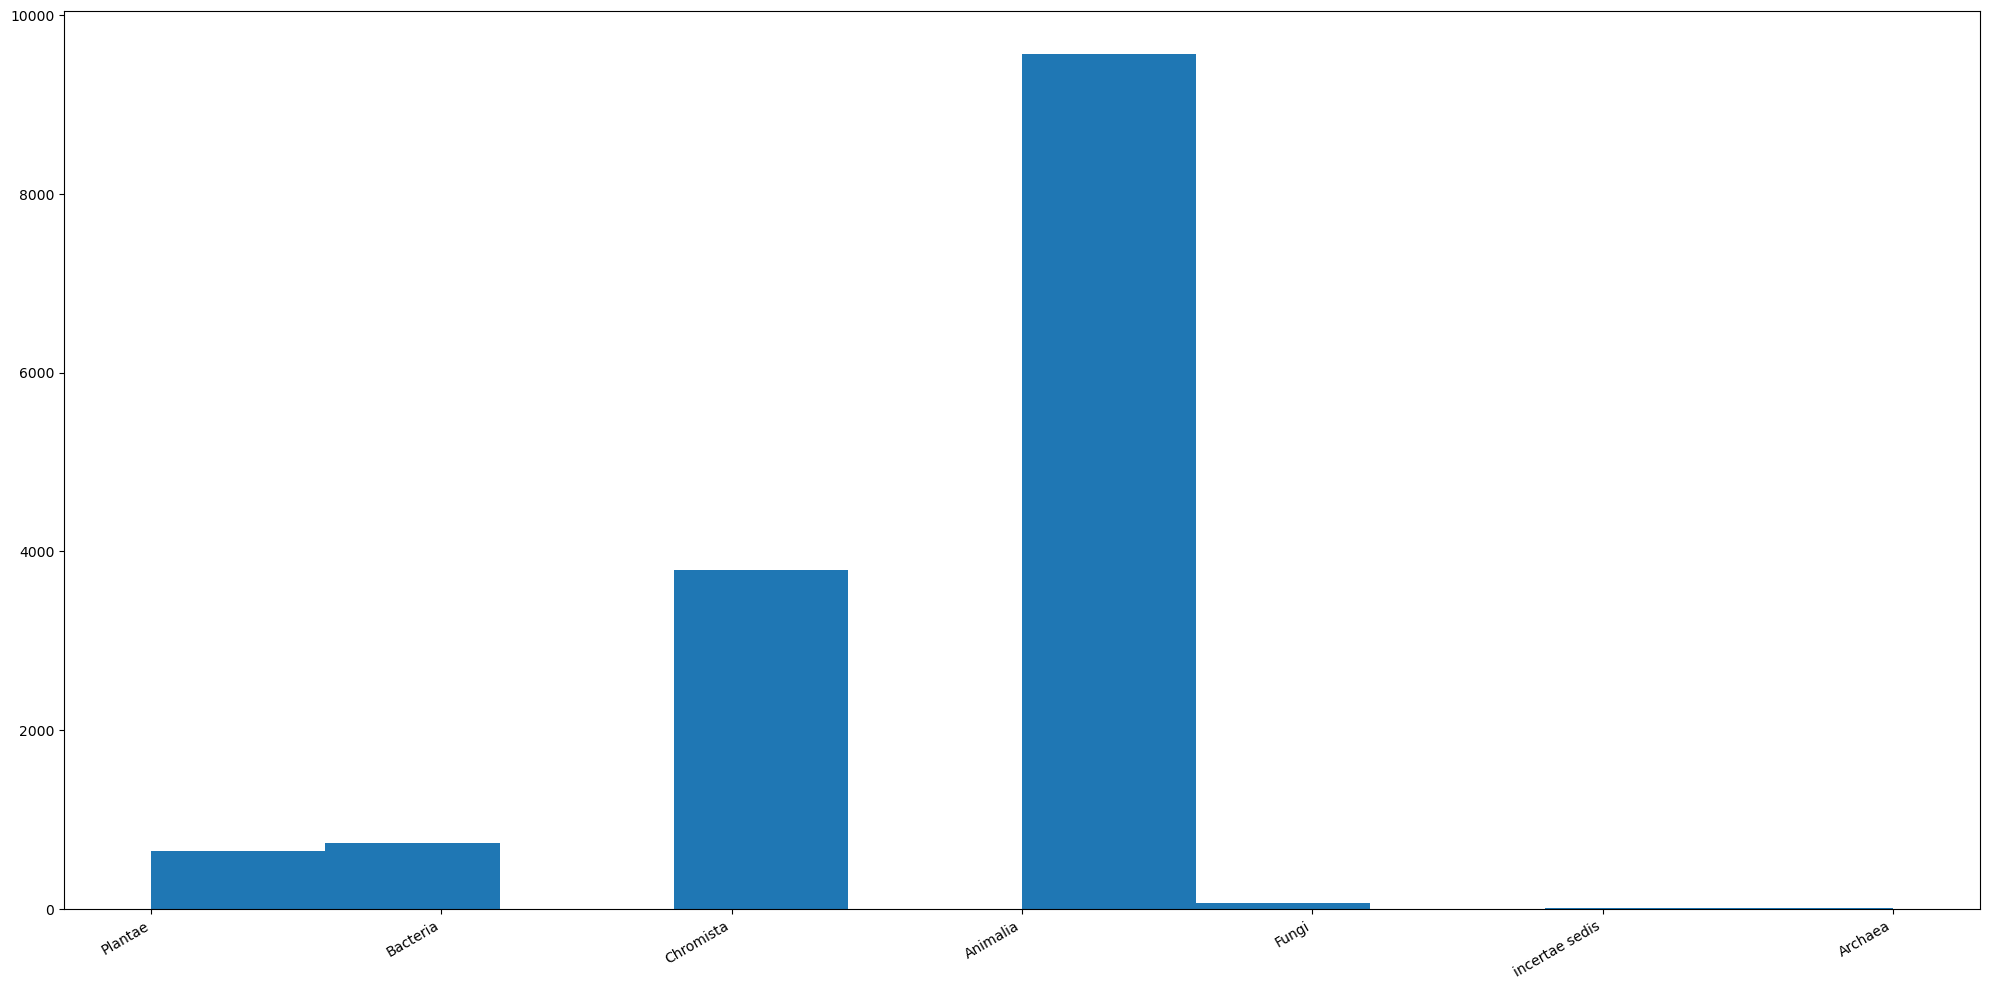

In [51]:
fig, ax = plt.subplots(figsize = (20,10))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
_ = ax.hist(kingdom)
# ax.pie(kingdom.count())

# ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
# ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
# _=ax.grid(b=True, which='major', color='w', linewidth=1.5)
# _=ax.grid(b=True, which='minor', color='w', linewidth=0.75)
fig.tight_layout()

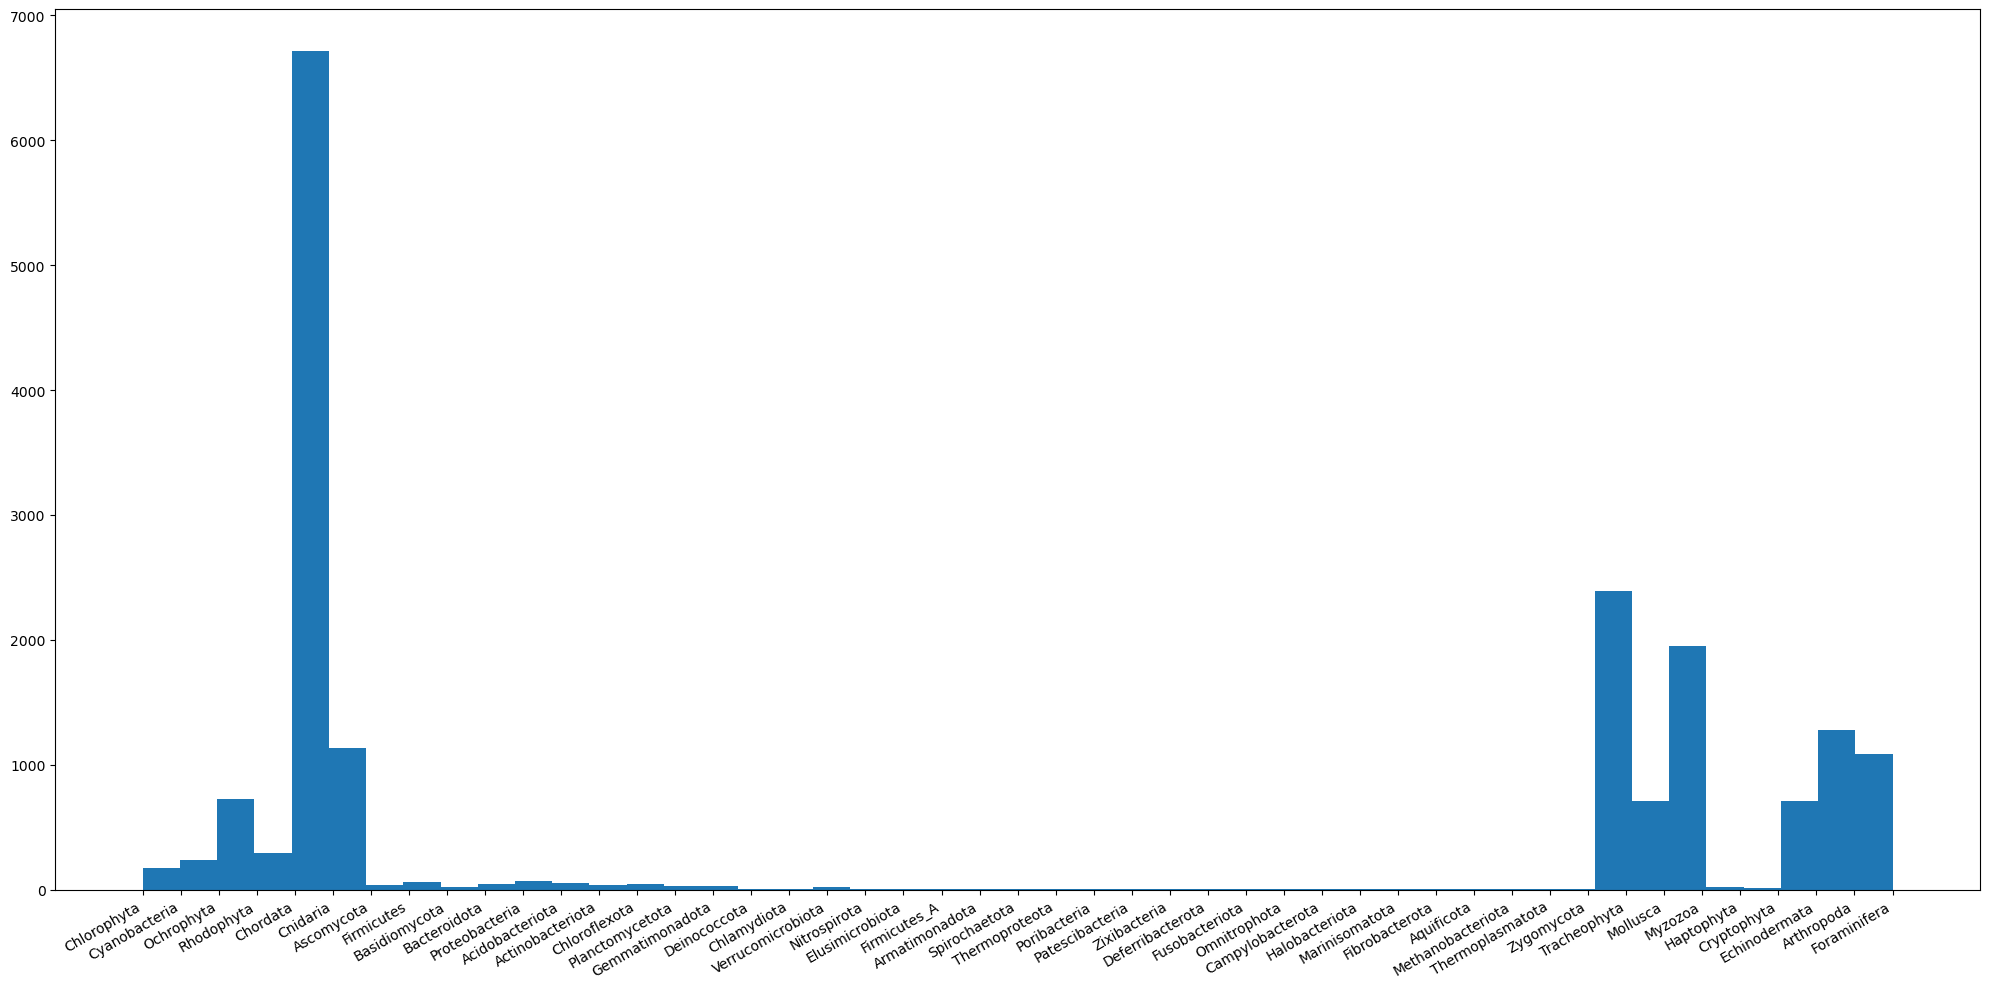

In [55]:
import matplotlib as mpl
fig, ax = plt.subplots(figsize = (20,10))
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
_ = ax.hist(phylum, bins = len_phylum)
# ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
# ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
# _=ax.grid(b=True, which='major', color='w', linewidth=1.5)
# _=ax.grid(b=True, which='minor', color='w', linewidth=0.75)
fig.tight_layout()

C:\Users\danie\AppData\Local\Temp\ipykernel_16932\668300168.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Cayo de Alburquerque',
C:\Users\danie\AppData\Local\Temp\ipykernel_16932\668300168.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_occurrences_SIB_format['island'] = df_occurrences_SIB_format['island'].replace(['Cayos de Serrana','Isla Cayo Serrana','Serrana Bank','Serrana'],
C:\Users\danie\AppData\Local\Tem

In [64]:
# df_occurrences_SIB_format[['scientificName', 'island']].groupby(['scientificName']).count().sort_values(by='island', ascending = False)

In [46]:
df_occurrences_SIB_format[['scientificName', 'island']].groupby(['scientificName']).count().\
            sort_values(by='island', ascending = False).head(10)

,island
scientificName,
"Lobatus gigas (Linnaeus, 1758)",688
Dinophyceae,193
"Tripos Bory de Saint-Vincent, 1823",182
Cyanobacteria,149
"Dinophysis Ehrenberg, 1839",112
"Oxytoxum Stein, 1883",106
"Thalassoma bifasciatum (Bloch, 1791)",101
"Ornithocercus Stein, 1883",96
"Protoperidinium Bergh, 1881",92


In [48]:
df_occurrences_SIB_format['scientificName']

0                  Caulerpa verticillata J.Agardh
1               Lyngbya majuscula Harv. ex Gomont
2                Dictyota mertensii (Mart.) Kütz.
3                            Gloioderma atlantica
4     Anadyomene stellata (Wulfen) C.Agardh, 1823
                         ...                     
90                                      Blattidae
91                                   Bostrichidae
92                                     Elateridae
93                                   Phytoseiidae
94                                      Blattidae
Name: scientificName, Length: 18003, dtype: object

(array([2843., 3955., 3180., 2096., 1449., 1185.,  612.,  250.,  358.,
        2075.]),
 array([   0. ,  242.5,  485. ,  727.5,  970. , 1212.5, 1455. , 1697.5,
        1940. , 2182.5, 2425. ]),
 <BarContainer object of 10 artists>)

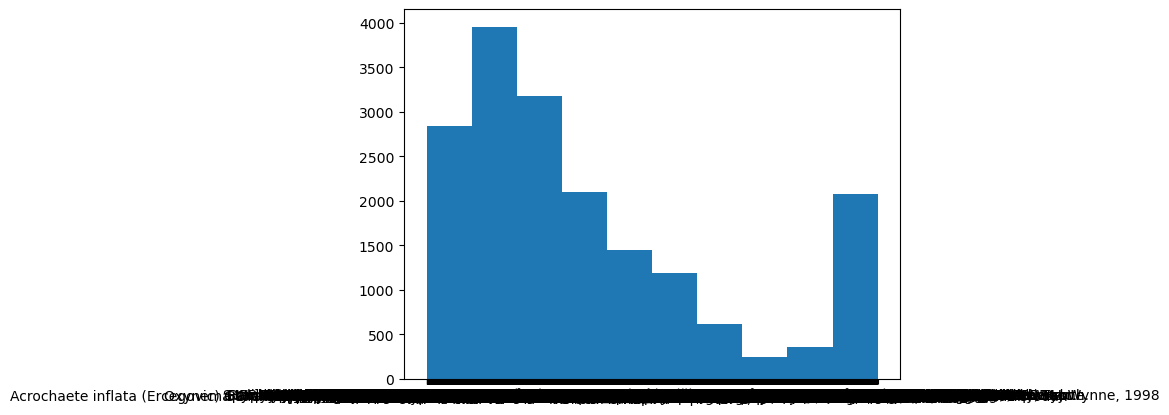

In [56]:
import matplotlib.pyplot as plt
plt.hist(df_occurrences_SIB_format['scientificName'])

In [55]:
df_temp = df_occurrences_SIB_format[['scientificName', 'island']].groupby(['island']).count()

In [21]:
df_occurrences_SIB_format['island'].value_counts().to_frame()

,island
Cayo Serrana,4493
Serranilla,3685
Cayo Alburquerque,3674
Malpelo,622
Isla de San Andrés,341
Providencia,334
Isla de Providencia,328
Providencia y Santa Catalina,317
Quitasueño,101
Roncador,73


In [67]:
df_occurrences_SIB_format['islandGroup'].value_counts().to_frame()

,islandGroup
"Archipiélago de San Andrés, Providencia y Santa Catalina",7784
Cayos del Norte,2736
Reserva de Biosfera Seaflower,2712
Cayos de Norte,414
Cayo del Norte,388
Cayo Beacon,106
Seaflower,58
Providencia y Santa Catalina,17


In [53]:
import matplotlib.pyplot as plt

(array([14.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.]),
 array([3.000e+00, 4.520e+02, 9.010e+02, 1.350e+03, 1.799e+03, 2.248e+03,
        2.697e+03, 3.146e+03, 3.595e+03, 4.044e+03, 4.493e+03]),
 <BarContainer object of 10 artists>)

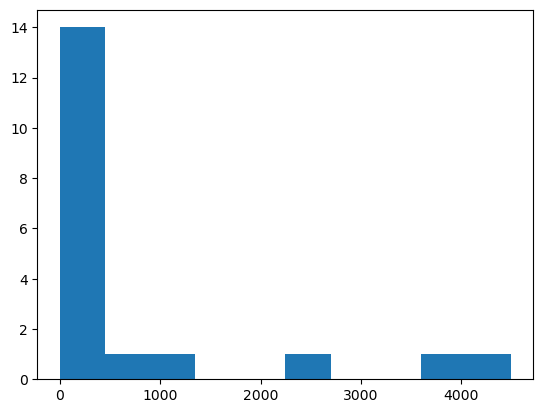

In [60]:
plt.hist(df_temp['scientificName'])

In [46]:
len(list(set(df_occurrences_SIB_format['scientificName'])))

2426

In [21]:
species = df_occurrences[columns_clean]['genus'] + ' ' + df_occurrences[columns_clean]['specificEpithet']

# Geopandas

In [68]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [69]:
geometry = [Point(xy) for xy in zip(df_occurrences_SIB_format['decimalLongitude'],
                                    df_occurrences_SIB_format['decimalLatitude'])]

In [80]:
geo_df_SIB

,index,id,type,language,license,rightsHolder,accessRights,institutionID,datasetID,institutionCode,...,phylum,class,order,family,genus,specificEpithet,taxonRank,nomenclaturalCode,taxonomicStatus,geometry
0,0,2980571363,Evento,es,CC_BY_NC_4_0,Universidad Nacional de Colombia,Sólo para uso no comercial citando la fuente,899.999.063-3,NaN,Universidad Nacional de Colombia (UNAL),...,Chlorophyta,Ulvophyceae,Bryopsidales,Caulerpaceae,Caulerpa,verticillata,SPECIES,NaN,ACCEPTED,POINT (-81.33880 13.39080)
1,1,2980571362,Evento,es,CC_BY_NC_4_0,Universidad Nacional de Colombia,Sólo para uso no comercial citando la fuente,899.999.063-3,NaN,Universidad Nacional de Colombia (UNAL),...,Cyanobacteria,Cyanobacteriia,Cyanobacteriales,Microcoleaceae,Lyngbya,majuscula,SPECIES,NaN,ACCEPTED,POINT (-81.33880 13.39080)
2,2,2980571361,Evento,es,CC_BY_NC_4_0,Universidad Nacional de Colombia,Sólo para uso no comercial citando la fuente,899.999.063-3,NaN,Universidad Nacional de Colombia (UNAL),...,Ochrophyta,Phaeophyceae,Dictyotales,Dictyotaceae,Dictyota,mertensii,SPECIES,NaN,ACCEPTED,POINT (-81.33880 13.39080)
3,3,2980571360,Evento,es,CC_BY_NC_4_0,Universidad Nacional de Colombia,Sólo para uso no comercial citando la fuente,899.999.063-3,NaN,Universidad Nacional de Colombia (UNAL),...,Rhodophyta,Florideophyceae,Rhodymeniales,Faucheaceae,Gloiocladia,atlantica,SPECIES,NaN,DOUBTFUL,POINT (-81.32240 13.41160)
4,4,2980571359,Evento,es,CC_BY_NC_4_0,Universidad Nacional de Colombia,Sólo para uso no comercial citando la fuente,899.999.063-3,NaN,Universidad Nacional de Colombia (UNAL),...,Chlorophyta,Ulvophyceae,Cladophorales,Anadyomenaceae,Anadyomene,stellata,SPECIES,NaN,SYNONYM,POINT (-81.33880 13.39080)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17376,90,1413703389,Evento,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,JBSAI-UN,...,Arthropoda,Insecta,Blattodea,Blattidae,NaN,NaN,FAMILY,NaN,ACCEPTED,POINT (-80.36661 14.28533)
17377,91,1413703388,Evento,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,JBSAI-UN,...,Arthropoda,Insecta,Coleoptera,Bostrichidae,NaN,NaN,FAMILY,NaN,ACCEPTED,POINT (-80.36661 14.28533)
17378,92,1413703386,Evento,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,JBSAI-UN,...,Arthropoda,Insecta,Coleoptera,Elateridae,NaN,NaN,FAMILY,NaN,ACCEPTED,POINT (-80.36661 14.28533)
17379,93,1413703379,Evento,NaN,CC_BY_4_0,NaN,NaN,NaN,NaN,JBSAI-UN,...,Arthropoda,Arachnida,Mesostigmata,Phytoseiidae,NaN,NaN,FAMILY,NaN,ACCEPTED,POINT (-80.36661 14.28533)


In [70]:
crs = {'init':'epsg:4326'}
geo_df_SIB = gpd.GeoDataFrame(df_occurrences_SIB_format, crs = crs, geometry = geometry)

C:\Users\danie\.conda\envs\geo_nenv\lib\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [81]:
geo_df_SIB.reset_index(drop=True, inplace = True)


In [82]:
geo_df_SIB.to_csv('test_geo_data.csv')

In [73]:
os.getcwd()
path = "C:\\Users\\danie\\Documents\\Data Science\\projectCCO"
os.chdir(path)

In [74]:
seaflower_area = gpd.read_file("reserva_biosfera_seaflower-IDEAM/reserva_biosfera_seaflower.shp")

In [75]:
print(seaflower_area['geometry'])


0    POLYGON ((-78.63200 15.60017, -78.63959 14.491...
Name: geometry, dtype: geometry


In [76]:
import matplotlib.pyplot as plt

<AxesSubplot:>

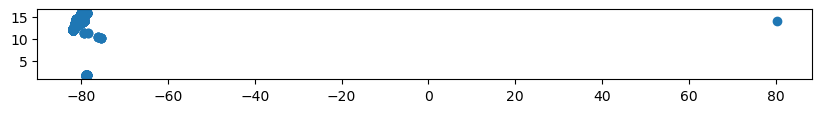

In [83]:
fig, ax = plt.subplots(figsize = (10,7))
# seaflower_area.plot(ax = ax)
geo_df_SIB[['geometry']].plot(ax=ax)


In [ ]:
from pygbif import maps


In [ ]:

out = maps.map(datasetKey = keys[1])
out.response
out.path
out.img
out.plot()


In [ ]:
species.dropna_nan(axis = 0)

In [43]:
!pip install qgis

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement qgis (from versions: none)
ERROR: No matching distribution found for qgis


In [ ]:
import processing 

## Adding all data registry in the Seaflower Area

In [ ]:
(-78.63200 15.60017, -78.63959 14.491)

In [28]:
a=occ.download('decimalLatitude > 78')


INFO:Your download key is 0052984-220831081235567


In [29]:
a

('0052984-220831081235567',
 {'creator': 'daniel.datasci',
  'notification_address': ['daniel.datasci@gmail.com'],
  'send_notification': 'true',
  'created': 2022,
  'predicate': {'type': 'and',
   'predicates': [{'type': 'greaterThan',
     'key': 'DECIMAL_LATITUDE',
     'value': '78'}]}})

In [70]:
import ecopy as ep
varespec = ep.load_data('varespec')
shannonH = ep.diversity(varespec, 'shannon')

ModuleNotFoundError: No module named 'ecopy'

In [ ]:
resultsSeaflower =  registry.dataset_search()
